In [54]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import text
from copy import deepcopy
import csv

In [55]:
x = np.linspace (1,15,15)
y = np.linspace (1,15,15)

In [56]:
xx, yy = np.meshgrid(x, y, indexing='ij')

In [57]:
class SLinePrimitive:
    x: np.ndarray
    y: np.ndarray
    
    def __init__(self, x, x0, y0, x1, y1):
        self.x = x
        self.x0 = x0
        self.x1 = x1
        self.y0 = y0
        self.y1 = y1
        self.drawn = False
           
    def draw(self):    #calling the SlinePrimitive between two elements of meshgrid
            if self.x0 != self.x1:
                self.y = (((self.y1-self.y0)/(self.x1-self.x0))*(self.x-self.x0)) + self.y0
                print(self.x, "=====" , self.y)
                plt.plot(self.x, self.y, color = 'k')
            else:
                plt.vlines(self.x, self.y0, self.y1, color = 'k')
                self.y = self.y0 
            self.drawn = True

In [58]:
class LineRightarrow:
      ## It is a line with a rightside arrow 
    x: np.ndarray
    y: np.ndarray
     
    def __init__(self, x0: float, y0: float):   
        self.x0 = x0
        self.y0 = y0
        self.x = self.x0
        self.text = ""
        
    def draw(self):
        plt.vlines(self.x, ymin= self.y0-2.5 , ymax= self.y0+2 , color = 'r', linestyle= 'dashed')
        plt.arrow(self.x0+0.7, self.y0-2, -0.5, 0, head_width=0.3, head_length=0.1, linewidth=4, color='r', length_includes_head=True)
        if self.text != "":
            text(self.x0+1.1, self.y0-2, self.text, rotation=0, verticalalignment='center')
            
    def setText(self, text):
        self.text = text

In [59]:
class LineLeftarrowPrimitive:
    ## It is a line with a leftside arrow
    x: np.ndarray
    y: np.ndarray
   
        
    def __init__(self, x0: float, y0: float):   
        self.x0 = x0
        self.y0 = y0
        self.x = self.x0
        self.text = ""
           
    def draw(self):
        plt.vlines(self.x, ymin=self.y0-2.5, ymax= self.y0+2, color = 'r', linestyle= 'dashed')
        plt.arrow(self.x0-0.7, self.y0-2, 0.5, 0, head_width=0.3, head_length=0.1, linewidth=4, color='r', length_includes_head=True)
        if self.text != "":
            text(self.x0+1.1, self.y0-2, self.text, rotation=0, verticalalignment='center')            
    def setText(self, text):
        self.text = text

In [60]:
class CoupleCheckerPrimitive:
    
    def __init__(self, left, right):
        self.left: LineRightarrow = left
        self.right: LineLeftarrowPrimitive = right
            
    @property
    def text(self):
        return self.left.text
            
    def setText(self, text):
        self.left.text = text
        
    def getRange(self):
        return self.left.x0, self.right.x0
            
    def draw(self):
        self.left.draw()
        self.right.draw()

In [61]:
class HorizontalLinePrimitive:
    x: np.ndarray
    y: np.ndarray   
    
    def __init__(self, y: float, x_min: float, x_max: float):   
        self.y = y
        self.x_min = x_min
        self.x_max = x_max
#        self.drawn = False
        self.text = ""
        
    def draw(self):
        plt.hlines(y= self.y, xmin= self.x_min, xmax=self.x_max, linewidth=1.5, color='g', linestyles='dashed')
        
        if self.text:
            text(self.x_min, self.y, self.text, ha='right', va='center')    
            
    def setText(self, text):
        self.text = text

In [62]:
class Wave:
    
    def __init__(self, name, primitives):
        self.name = name
        self.primitives = primitives
        self.drawn = []
        self.texts = []
        self.h_lines = {}
        
    def validate(self):
        left_cnt = len([x for x in self.primitives if isinstance(x, line_leftarrow_primitive)])
        right_cnt = len([x for x in self.primitives if isinstance(x, line_rightarrow_primitive)])
        horizontal_cnt = len([x for x in self.primitives if isinstance(x, horizontal_line_primitive)])
        if left_cnt == right_cnt:
            return True
        return False
    
    def getAllPoints(self):
        """Return all x and y points of a wave."""
        x = []
        y = []
        for prim in self.primitives:
            if isinstance(prim, SLinePrimitive):
                print(prim.x, ",",prim.y)
                if isinstance(prim.x, (list, np.ndarray)): 
                    x.extend(prim.x)
                    y.extend(prim.y)
                else:
                    x.append(prim.x)
                    y.append(prim.y)
            
        return x,y
    
    def saveTexts(self):
        return

    def draw(self):
        for plot in self.primitives:        
            if isinstance(plot, HorizontalLinePrimitive):
                text = input("Set text for hline please (press enter)!")
                self.texts.append(("h", text))
                self.h_lines[plot.y] = text
                plot.setText(text)
                
            if isinstance(plot, CoupleCheckerPrimitive):
                text = input("Set text for vline couple please (press enter)!")
                self.texts.append(("h", text))
                self.h_lines[plot.left.y0] = text
                plot.setText(text)     
                  
            plot.draw()
            self.drawn.append(plot)
        self.saveTexts()
        x_points, y_points = self.getAllPoints()
        plt.text(x_points[-1]+1, (min(y_points) + max(y_points))/2, self.name, weight='bold', ha='right', va='center')

In [63]:
class PSLGenerator:
    def __init__(self, waves):
        self.waves: Wave = waves     
        
    def traverse(self):
        for wave in self.waves:
            print(wave.name)
            
    def generate(self):
        all_wave_str = []
        for wave in self.waves:
            wave_str = []
            w_x, w_y = wave.getAllPoints()
            for prim in wave.primitives:
                if isinstance(prim, (LineRightarrow, LineLeftarrowPrimitive)):
                    print(f"index of {prim.x0} from list {w_x}")
                    idx = w_x.index(prim.x0)
                    y_value = int(w_y[idx])
                    h_line = wave.h_lines[y_value]
                    str_part = f"{wave.name}=={h_line}"
                    wave_str.append(str_part)
                
                if isinstance(prim, CoupleCheckerPrimitive):
                    x_range = prim.getRange()
                    x_start_idx = w_x.index(x_range[0])
                    x_end_idx = w_x.index(x_range[1])
                    all_y_range = np.array(w_y[x_start_idx : x_end_idx+1])
                    unique, count = np.unique(all_y_range, return_counts=True)
                    y_value = unique[np.argmax(count)].astype(int)
                    if(len(y) > 1):
                        print("Something is wring")
                    h_line = wave.h_lines[y_value]
                    str_part = f"{wave.name}=={h_line}[*{prim.text}]"
                    wave_str.append(str_part)
        
            all_wave_str.append(f"{{{' ; '.join(wave_str)}}}")
        
        print(all_wave_str)
        return  f"{{{' && '.join(all_wave_str)}}}"  

[2 3 4] ===== [12. 12. 12.]
[ 4  5  6  7  8  9 10 11 12 13 14] ===== [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
Set text for hline please (press enter)!1
Set text for hline please (press enter)!0
[2 3 4] , [12. 12. 12.]
4 , 10
[ 4  5  6  7  8  9 10 11 12 13 14] , [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
[2 3 4 5] ===== [4. 4. 4. 4.]
[5 6 7 8] ===== [7. 7. 7. 7.]
[ 8  9 10 11] ===== [4. 4. 4. 4.]
[11 12 13 14] ===== [7. 7. 7. 7.]
Set text for vline couple please (press enter)!t1
Set text for hline please (press enter)!1
Set text for hline please (press enter)!0
[2 3 4 5] , [4. 4. 4. 4.]
5 , 4
[5 6 7 8] , [7. 7. 7. 7.]
8 , 4
[ 8  9 10 11] , [4. 4. 4. 4.]
11 , 4
[11 12 13 14] , [7. 7. 7. 7.]
[2 3 4] , [12. 12. 12.]
4 , 10
[ 4  5  6  7  8  9 10 11 12 13 14] , [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
index of 7 from list [2, 3, 4, 4, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[2 3 4 5] , [4. 4. 4. 4.]
5 , 4
[5 6 7 8] , [7. 7. 7. 7.]
8 , 4
[ 8  9 10 11] , [4. 4. 4. 4.]
11 , 4
[11 12 

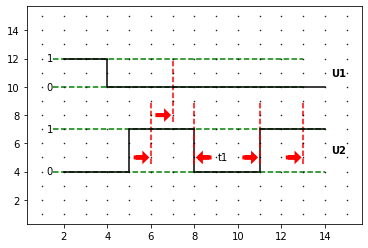

In [64]:
plt.plot(xx, yy, marker='.', markersize=1, color='k', linestyle='none')
lines = []
lines1 = []

#plotting the upper waveforms 
# 1. plotting the sequence of primitives 
line = SLinePrimitive(x=np.arange(2,4+1,1), x0 = 2, y0= 12, x1= 4, y1= 12)
lines.append(deepcopy(line))
line = SLinePrimitive(x= 4, x0= 4, y0= 10, x1= 4, y1= 12)
lines.append(deepcopy(line))
line = SLinePrimitive(x=np.arange(4,14+1,1), x0 = 4, y0= 10, x1= 14, y1= 10)
lines.append(deepcopy(line)) 

#calling the psl primitives

# 2. plotting single vline primitive
line = LineLeftarrowPrimitive(x0= 7, y0= 10)   
lines.append(deepcopy(line))

# 3. plotting 2 horizontal labeling lines
line = HorizontalLinePrimitive(y= 12, x_min=1.5, x_max= 13)  
lines.append(deepcopy(line))
line = HorizontalLinePrimitive(y= 10, x_min= 1.5, x_max= 13) 
lines.append(deepcopy(line))


# Plotting the lower waveforms
# 1. plotting the sequence of primitives
line = SLinePrimitive(x=np.arange(2,5+1,1), x0 = 2, y0= 4, x1= 5, y1= 4)
lines1.append(deepcopy(line))
line = SLinePrimitive(x= 5, x0=5, y0= 4, x1=5, y1= 7)
lines1.append(deepcopy(line))
line = SLinePrimitive(x=np.arange(5,8+1,1), x0 = 5, y0= 7, x1= 8, y1= 7)
lines1.append(deepcopy(line))
line = SLinePrimitive(x= 8, x0=8, y0= 4, x1=8, y1= 7)
lines1.append(deepcopy(line))
line = SLinePrimitive(x=np.arange(8,11+1,1), x0 = 8, y0= 4, x1= 11, y1= 4)
lines1.append(deepcopy(line))
line = SLinePrimitive(x= 11, x0= 11, y0= 4, x1= 11, y1= 7)
lines1.append(deepcopy(line))
line = SLinePrimitive(x=np.arange(11,14+1,1), x0 = 11, y0= 7, x1= 14, y1= 7)
lines1.append(deepcopy(line))

#calling the psl primitives

# 2.plotting the first single psl primitive
line = LineLeftarrowPrimitive(x0= 6, y0= 7)
lines1.append(deepcopy(line))

# 3.set of couple time primitive
line_left = LineRightarrowPrimitive(x0= 8, y0= 7)
line_right = LineLeftarrowPrimitive(x0= 11, y0= 7)
couple = CoupleCheckerPrimitive(line_left, line_right)
lines1.append(deepcopy(couple))

# 4.plotting the second single psl primitive
line = LineLeftarrowPrimitive(x0= 13, y0= 7)
lines1.append(deepcopy(line))

# 5calling a set of horizontal labeling lines
line = HorizontalLinePrimitive(y= 7, x_min=1.5, x_max= 14)
lines1.append(deepcopy(line))
line = HorizontalLinePrimitive(y= 4, x_min= 1.5, x_max= 14)
lines1.append(deepcopy(line))


wave1 = Wave("U1",lines)
wave2 = Wave("U2", lines1)
wave1.draw()
wave2.draw()
plt.savefig("Output, Image file, example3", facecolor='w', bbox_inches="tight", pad_inches=0.3, transparent=True)

generator = PSLGenerator([wave1, wave2])
#print(generator.traverse())

with open("Output, PSL file, example3.csv", "w") as f:                
    f.write(generator.generate())